In [1]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.estimators import HillClimbSearch, BicScore
import networkx as nx
import matplotlib.pyplot as plt

/Users/shuomura/workspace/ml_sandbox/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# ベイジアンネットワークの構造を定義
model = BayesianModel([("Difficulty", "Grade"), ("Intelligence", "Grade")])

# データを作成
raw_data = np.random.randint(low=0, high=5, size=(1000, 3))
data = pd.DataFrame(raw_data, columns=["Difficulty", "Intelligence", "Grade"])

# モデルにデータを適用して、条件付き確率分布を学習
model.fit(data, estimator=MaximumLikelihoodEstimator)

# 推論オブジェクトの作成
infer = VariableElimination(model)

# 事後確率を求める
query = infer.query(variables=["Grade"], evidence={"Difficulty": 0, "Intelligence": 1})
print("P(Grade | Difficulty=0, Intelligence=1):")
print(query)

# 最も確率が高い結果を求める
map_query = infer.map_query(variables=["Grade"], evidence={"Difficulty": 0, "Intelligence": 1})
print("Most probable Grade given Difficulty=0 and Intelligence=1:", map_query)

/Users/shuomura/workspace/math/venv/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
/Users/shuomura/workspace/math/venv/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


P(Grade | Difficulty=0, Intelligence=1):
+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(0) |       0.2045 |
+----------+--------------+
| Grade(1) |       0.2273 |
+----------+--------------+
| Grade(2) |       0.1818 |
+----------+--------------+
| Grade(3) |       0.2273 |
+----------+--------------+
| Grade(4) |       0.1591 |
+----------+--------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

Most probable Grade given Difficulty=0 and Intelligence=1: {'Grade': 1}


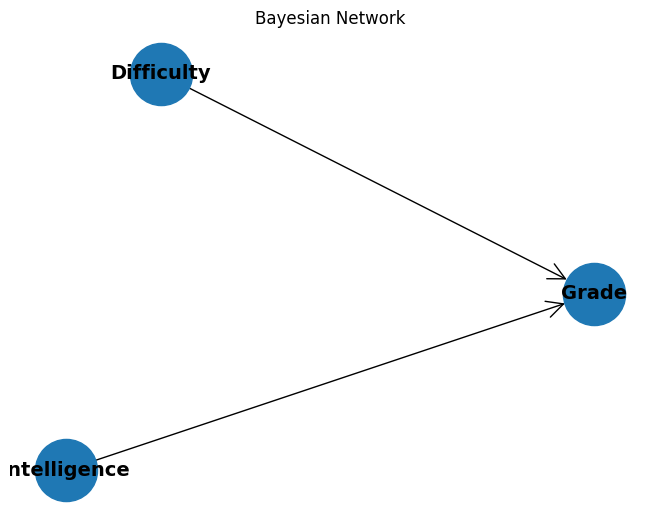

In [9]:
# pgmpyのベイジアンネットワークモデルからnetworkxのグラフオブジェクトを作成
G = nx.DiGraph()
G.add_edges_from(model.edges())

# ノードのラベルを設定
labels = {node: node for node in model.nodes()}

# グラフを描画
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, font_weight="bold", font_size=14, arrowsize=30, arrowstyle="->")
plt.title("Bayesian Network")
plt.show()


In [12]:
data

,Difficulty,Intelligence,Grade
0,1,0,0
1,1,0,0
2,1,1,1
3,1,0,1
4,0,1,1
...,...,...,...
995,1,0,0
996,0,0,1
997,1,1,0
998,0,0,0


In [21]:
bic = BicScore(data)

# HillClimbSearchオブジェクトを作成
hc = HillClimbSearch(data)

# データから最適な構造を見つける
best_model = hc.estimate(scoring_method=bic)
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[]


In [19]:
best_model.edges()

OutEdgeView([])